# Home Assignment No. 2 Part 1

To solve this task, you will write a lot of code to try several deep learning approaches.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [pytorch](https://pytorch.org/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `pytorch` and `torchvision` libraries instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed`, i.e., to use `torch.manual_seed(...)` and `np.random.seed(...)`.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Remember to use **GPU** computations in `pytorch`. For this, you have to write `model.cuda()`, `tensor.cuda()` to put your model/tensor to GPU. If you do not want to have an easy life, you may compute everything on **CPU** (default).

* If you have **multiple** GPUs available, you may call `torch.cuda.set_device(DEVICE_ID)` to specify the particular  GPU device to be used. Also, you are allowed to use `torch.nn.DataParallel(...)` to compute on multiple GPUs but a **single Google Colab GPU is enough for each task**.


---


# Part 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).
  
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.
  
* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

In [65]:
# Your imports

import GPy
from sklearn.metrics import r2_score

## Task 1 - Gaussian Processes (2 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`.

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction.
* Inspect them on normality by scatter plot: plot predicted points/time series against true values.
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [ ]:
! pip install GPy==1.13.1

Audited 1 package in 71ms


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
y = np.array(data.values)
X = np.array(data.index)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
ss = StandardScaler()
y_train_norm = ss.fit_transform(y_train)
y_test_norm = ss.transform(y_test)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

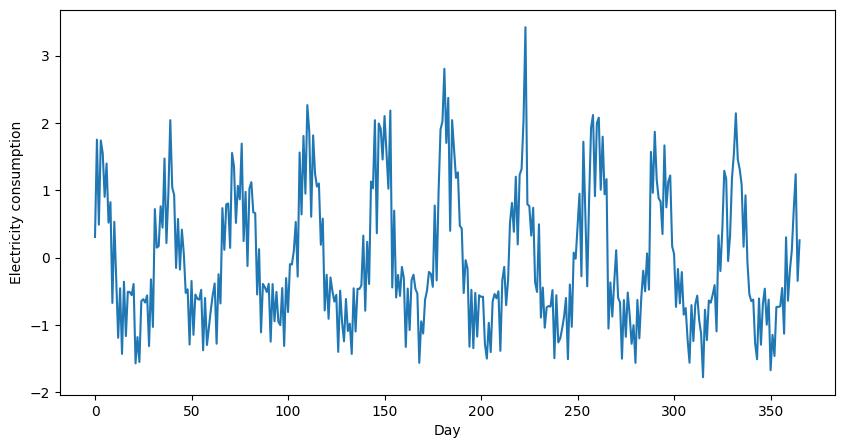

In [35]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(10, 5))
plt.plot(X, np.concatenate((y_train_norm, y_test_norm)))
plt.xlabel('Day')
plt.ylabel('Electricity consumption')
plt.show()
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction. Try to use kernels to obtain the expected result.

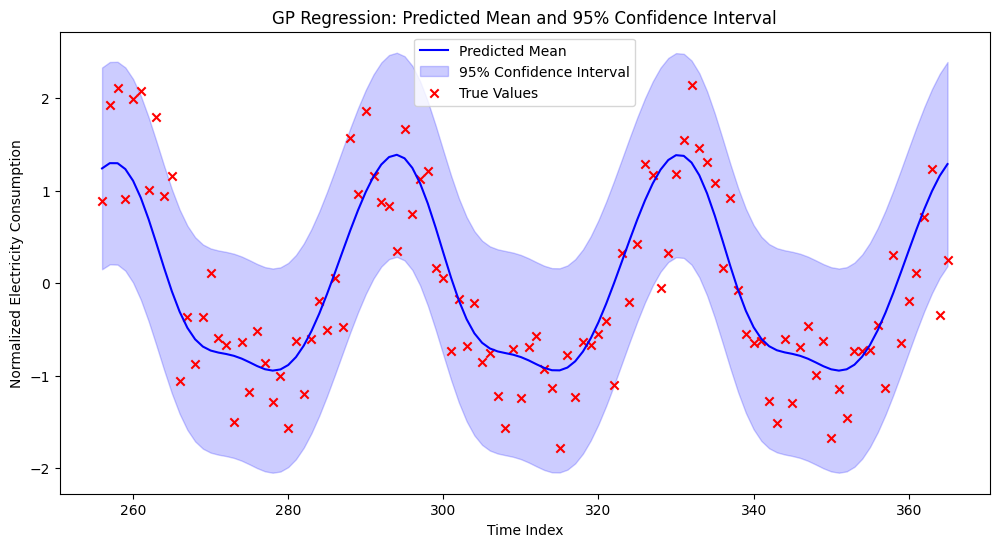

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)
kernel = (GPy.kern.RBF(input_dim=1) + 
          GPy.kern.StdPeriodic(input_dim=1, period=40))

model = GPy.models.GPRegression(X_train, y_train_norm, kernel)
model.optimize(messages=False)
y_pred_mean, y_pred_var = model.predict(X_test)
y_pred_std = np.sqrt(y_pred_var)

plt.figure(figsize=(12, 6))
plt.plot(X_test, y_pred_mean, 'b-', label='Predicted Mean')
plt.fill_between(X_test.flatten(), 
                 (y_pred_mean - 2*y_pred_std).flatten(), 
                 (y_pred_mean + 2*y_pred_std).flatten(), 
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.scatter(X_test, y_test_norm, color='red', marker='x', label='True Values')
plt.xlabel("Time Index")
plt.ylabel("Normalized Electricity Consumption")
plt.title("GP Regression: Predicted Mean and 95% Confidence Interval")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

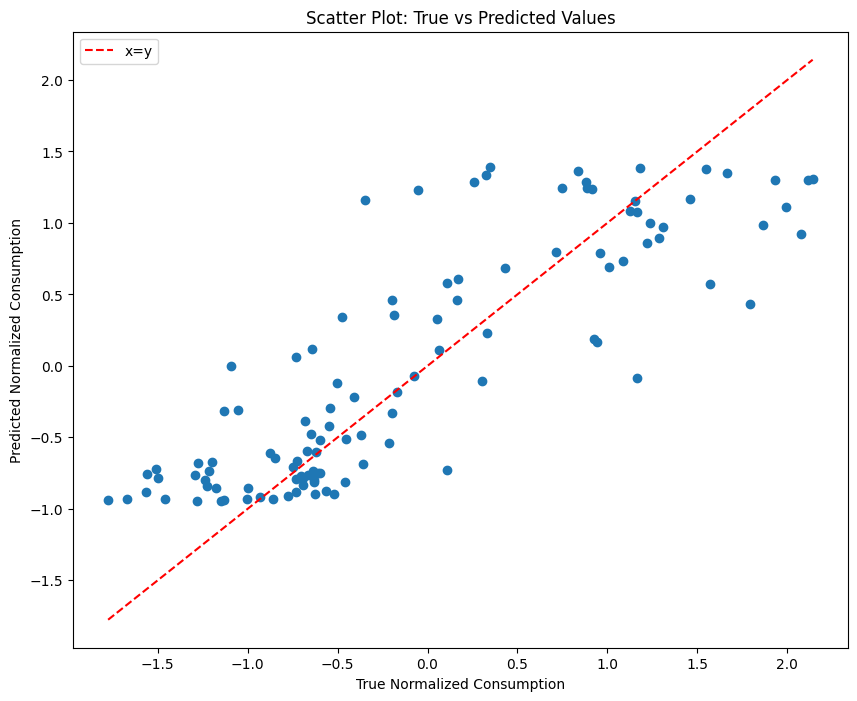

In [172]:
### BEGIN SOLUTION (do not delete this comment!)
plt.figure(figsize=(10, 8))
plt.scatter(y_test_norm, y_pred_mean)
min_val = min(y_test_norm.min(), y_pred_mean.min())
max_val = max(y_test_norm.max(), y_pred_mean.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y')
plt.xlabel("True Normalized Consumption")
plt.ylabel("Predicted Normalized Consumption")
plt.title("Scatter Plot: True vs Predicted Values")
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [173]:
### BEGIN SOLUTION (do not delete this comment!)
y_pred_orig = ss.inverse_transform(y_pred_mean)
r2 = r2_score(y_test, y_pred_orig)
print("R2 Score:", r2)
### END SOLUTION (do not delete this comment!)

R2 Score: 0.7115798985630521


## Task 2 - MNIST, feature selection, component analysis and manifold learning. (8 pts.)

### Task 2.1. (2 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, you may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [79]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.77it/s]


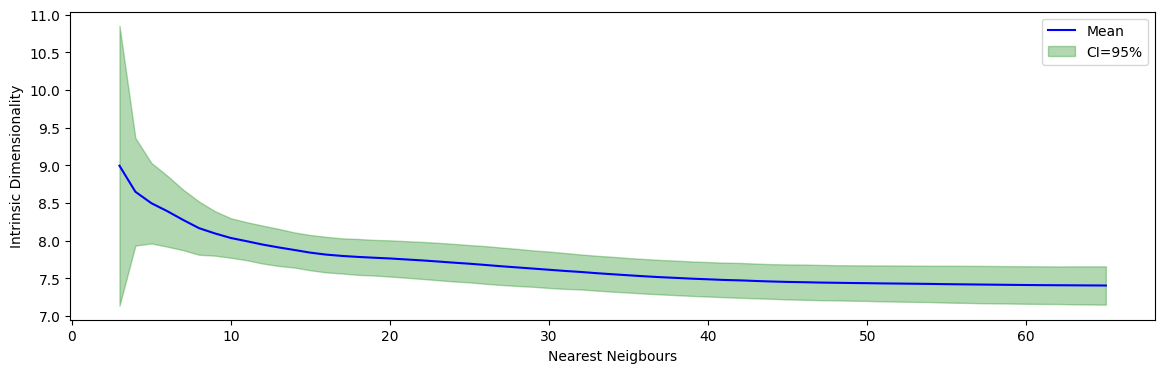

In [174]:
### BEGIN SOLUTION (do not delete this comment!)
"""
Implementation of 'Maximum Likelihood Estimation of Intrinsic Dimension' by Elizaveta Levina and Peter J. Bickel
how to use
----------
The goal is to estimate intrinsic dimensionality of data, the estimation of dimensionality is scale dependent
(depending on how much you zoom into the data distribution you can find different dimesionality), so they
propose to average it over different scales, the interval of the scales [k1, k2] are the only parameters of the algorithm.
This code also provides a way to repeat the estimation with bootstrapping to estimate uncertainty.
Here is one example with swiss roll :
from sklearn.datasets import make_swiss_roll
X, _ = make_swiss_roll(1000)
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             X, 
                             mode='bootstrap', 
                             nb_iter=500, # nb_iter for bootstrapping
                             verbose=1, 
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)
# the shape of intdim_k_repeated is (nb_iter, size_of_interval) where 
# nb_iter is number of bootstrap iterations (here 500) and size_of_interval
# is (k2 - k1 + 1).
# Plotting the histogram of intrinsic dimensionality estimations repeated over
# nb_iter experiments
plt.hist(intdim_k_repeated.mean(axis=1))
"""
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results
k1 = 3
k2 = 65
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, data, k1=k1, k2=k2, verbose=1)
intdim_k_repeated = np.array(intdim_k_repeated)
x = np.arange(k1, k2+1)
plt.figure(figsize=(14, 4))
plt.plot(x, np.mean(intdim_k_repeated, axis=0), 'b', label='Mean')
plt.fill_between(x,
                 np.mean(intdim_k_repeated, axis=0) -
                 2 * np.std(intdim_k_repeated, axis=0),
                 np.mean(intdim_k_repeated, axis=0) +
                 2 * np.std(intdim_k_repeated, axis=0),
                 alpha=0.3,
                 label='CI=95%',
                 color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()
### END SOLUTION (do not delete this comment!)

1.1) There are many intrinsic dimensionality estimators operating on different assumptions about data structure, and MLE, that you've just used, is only one of them. It is a *local* method, and the number of neighbours you provided it defines how big you consider local structures to be.
Now, what can you tell about the strucuture of MNIST from the plot above? (we expect here only a short answer)

*BEGINNIG OF YOU ANSWER*

*END OF YOU ANSWER*

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

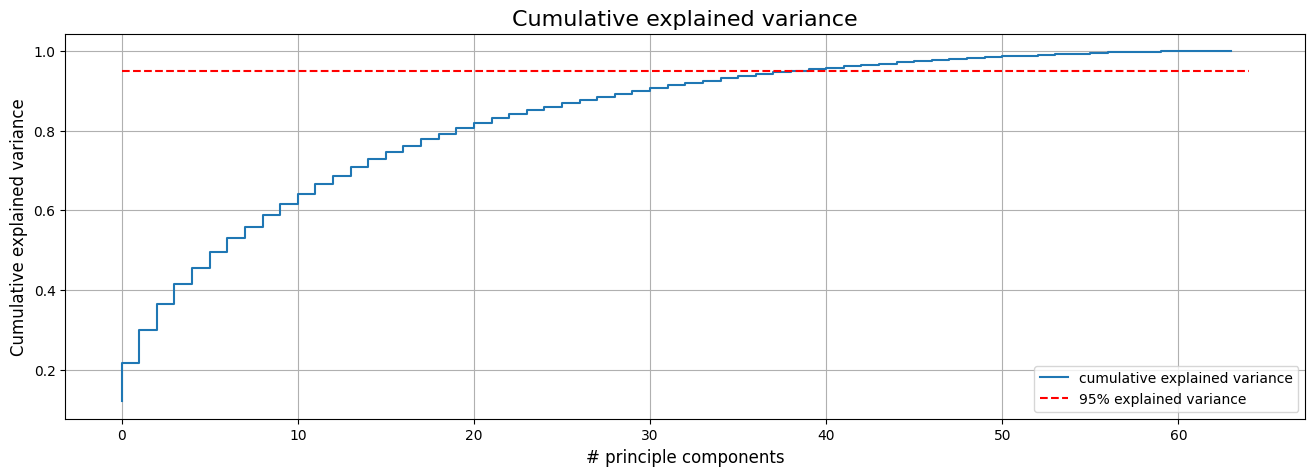

In [128]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA
pca = PCA().fit(data)

plt.figure(figsize=(16, 5))

plt.step(range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.hlines(y=0.95, xmin=0, xmax= len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### END SOLUTION (do not delete this comment!)

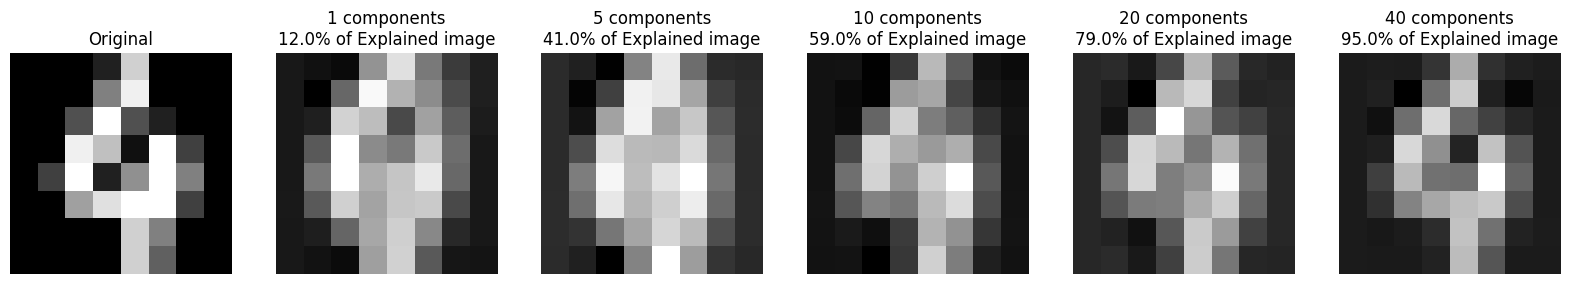

In [166]:
### BEGIN SOLUTION (do not delete this comment!)
sample_index = 100
original_digit = [data[sample_index]]
digit_pca = pca.transform(original_digit)

components_list = [1, 5, 10, 20, 40]

n_cols = len(components_list) + 1  # including the original
plt.figure(figsize=(20, 3))

# Plot the original image
plt.subplot(1, n_cols, 1)
plt.imshow(scaler.inverse_transform(original_digit).reshape(8, 8), cmap='gray')
plt.title('Original')
plt.axis('off')


for i, k in enumerate(components_list, start=2):

    coeff = np.zeros_like(digit_pca)
    coeff[0, :k] = digit_pca[0, :k]

    reconstructed = pca.inverse_transform(coeff)
    reconstructed_image = scaler.inverse_transform(reconstructed).reshape(8, 8)

    explained_var = np.sum(pca.explained_variance_ratio_[:k])
    
    plt.subplot(1, n_cols, i)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'{k} components\n{np.round(explained_var*100)}% of Explained image')
    plt.axis('off')

plt.show()

### END SOLUTION (do not delete this comment!)

#### **Now answer some questions**

2.1.2.1) Look at your plot of the cumulative variance. How observed results corrensponds to your estimation of the instrinsic dimension of the data? If there is a discrepance, what can be its cause?


*BEGIN OF YOU ANSWER*

*END OF YOU ANSWER*


2.1.2.2) What does the result of back-decomposion shows? Does the quality of the back-decomposed images matter, if you wan to reduce the dimensionality of MNIST for further classification?

*BEGIN OF YOU ANSWER*

*END OF YOU ANSWER*

### Task 2.2. (2 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features.

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `n_splits=5` with $3$ repeats. Use `RepeatedKFold` and fit it using `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.3


In [150]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [154]:
from sklearn.model_selection import cross_val_score

target = dg.target

n_components = 40

pca = PCA(n_components=n_components, random_state=42)
ica = FastICA(n_components=n_components, random_state=42)
isomap = Isomap(n_components=n_components)

data_pca = pca.fit_transform(data)
data_ica = ica.fit_transform(data)
data_isomap = isomap.fit_transform(data)

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
clf = LogisticRegression(max_iter=10000, random_state=42)

scores_pca = cross_val_score(clf, data_pca, target, cv=rkf)
scores_ica = cross_val_score(clf, data_ica, target, cv=rkf)
scores_isomap = cross_val_score(clf, data_isomap, target, cv=rkf)

acc_pca = np.mean(scores_pca)
acc_ica = np.mean(scores_ica)
acc_isomap = np.mean(scores_isomap)

print("PCA: ", acc_pca)
print("FastICA: ", acc_ica)
print("Isomap: ", acc_isomap)



PCA:  0.9634550706695554
FastICA:  0.930986794594037
Isomap:  0.9658686681110081


In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

Expected output format (exact numbers may vary)

PCA:  0.8710878984834418
FastICA:  0.8018920870731455
Isomap:  0.9475049004436191


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`.

In [ ]:
t_stat_pca, p_val_pca = stats.ttest_rel(scores_isomap, scores_pca)
t_stat_ica, p_val_ica = stats.ttest_rel(scores_isomap, scores_ica)

print("Paired t-test (Isomap vs PCA) p-value:", p_val_pca)
print("Paired t-test (Isomap vs ICA) p-value:", p_val_ica)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

Expected output format

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic: 13.07 p_value: 1.2677e-12
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistic: 22.452 p_value: 2.1543e-14


### Task 2.3. (2 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

*END SOLUTION (do not delete this comment!)*

### Task 2.4. Metrics for unsupervised dimensionality reduction  (2pt)

Dimensionality reduction is often performed in the unsuperwised settings where labels are unavailable. In this case, we can not use classification accuracy to measure the quality of dimensionality reduction.

In such case, focus is made on how good the geometry of the data is preserved **(this is a different goal from classification!)**. This is a very vague goal, and so there are different ways to formalise this "*how good*". Here you will explore two of them:

1) Pearson (linear) corellation coefficient between distances within the point cloud before and after dimensionality reduction.

2) [Triplet Distance Ranking Accuracy.](https://arxiv.org/pdf/2012.04456) Use implementation provided in the attached file `triplet_accuracy.py`.

Calculate these metrics for `ICA`, `PCA` and `Isomap`. Don't forget to use RepeatedKFold with the same parameters as before. Fit your dimensionality reduction on the train subset, and calculate metrics on the test subset.

**Hint**: you can calculate both metrics in the same cycle.

1) Calculate the Pearson (linear) corellation coefficient between distances within the point cloud before and after dimensionality reduction.

In [ ]:
from scipy.spatial.distance import cdist
from triplet_accuracy import triplet_accuracy

### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

Expected output format (exact numbers may vary depending on number of components you use)

PCA:  0.8193985345000321
FastICA:  0.846350240282984
Isomap:  0.5878143364670503


2) Report the triplet distance ranking accuracy

In [ ]:
# Example of triplet_accuracy(...) usage:
# value = triplet_accuracy(input_data, dim_reduced_data)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

Expected output format (exact numbers may vary depending on number of components you use
PCA:  0.8717905276467143
FastICA:  0.8008677586594619
Isomap:  0.7137939687372331


## Task 3. Feature Selection (4 pt.)

### Task 3.1. Feature selection meets dimensionality reduction (2 pt.)

For this task, your task will be to access the quality of featire selection as dimensionality reduction (in a sence, it *is* dimensionality reduction --- you select a number of axis and project your data them).



Use Mutual Information and select `K` most important features (`K` is your estimation for the intrinsic dimensionality). In the same setup as before, calculate and report the

<ul>
  <li> Classification accuracy </li>
  <li> Distance Pearson correlation coefficient</li>
  <li> Triplet Distance ranking accuracy</li>
</ul>

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

### Task 3.2. Feature selection via Logistic Regression (2 pt.)

Lasso (linear regression with $L_1$-regularization) can be used to select features. It is easy to implement, but you can't directly control how much features it will select. But, you can control the strictness of feature selection through the regularization parameter `C` (inverse of regularization strength).

**Task:** Investigate how accuracy of multi-class logistic regression changes depending on choice of parameter `C`, and how changes the number of selected features (those having non-zero coefficients).
<ol>
    <li> Select $15$ values for C evenly spaced between $10^{-3}$ and 10 on logarithmic scale. </li>
   <li>For each train logistic regression, report train/test accuracy, and percentage of selected features.</li>
    <li>Plot the results.</li>
</ol>

**Hint:** you can acess weights of a sklearn `LogisticRegression` model through its `coef_` parameter.


For this (and the next) task you will use `KMNIST` dataset https://github.com/rois-codh/kmnist. Here you will use only a subsample of 10,000 train and 5,000 test samples.

In [ ]:
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')[:10000]
x_test = load('kmnist-test-imgs.npz')[:5000]
y_train = load('kmnist-train-labels.npz')[:10000]
y_test = load('kmnist-test-labels.npz')[:5000]

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

Plot the results:

Expected output format:


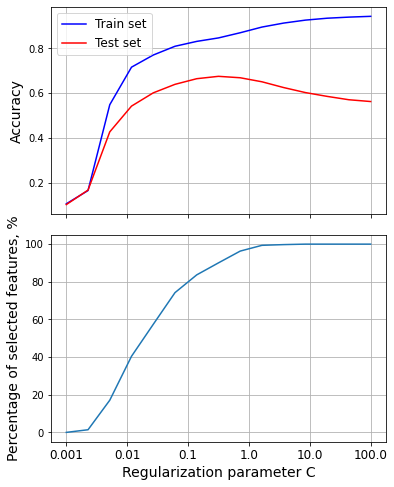

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

## Task 4. Practice on dimensionality reduction. (4  pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

Get accuracy on `test_set` more than 93%.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`.

In [ ]:
import numpy as np

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
### BEGIN SOLUTION (do not delete this comment!)


### END SOLUTION (do not delete this comment!)

Expected output format

Test accuracy: 0.9321


# Part 2

## Task 1. Toy Deep Learning. (11 points)

### Task 1.1: Implement basic neural network layers in Python (2 points for each function)

The goal of this task is to create simple implementations of common neural network layers by using `torch` library (**you are not allowed to use torch.nn, use linear algebra and simple functions from torch**):
- Dense (fully connected) layer
- ReLU activation function
- Softmax activation function
- Flatten layer
- MaxPooling layer

Each layer should support forward and backward propagation.

In [175]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


class MaxPooling(nn.Module):
    """
    Custom implementation of MaxPooling layer.
    Parameters:
        kernel_size (int): Size of the pooling window.
        stride (int): Step size for the pooling operation.
    """
    def __init__(self, kernel_size=2, stride=2):
        super(MaxPooling, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        """Forward pass of max pooling."""
        ### BEGIN Solution (do not delete this comment)
        self.x = x
        N, C, H, W = x.shape
        k, s = self.kernel_size, self.stride
        H_out = (H - k) // s + 1
        W_out = (W - k) // s + 1
        x_unfold = x.unfold(2, k, s).unfold(3, k, s)
        x_unfold = x_unfold.contiguous().view(N, C, H_out, W_out, -1)
        pooled, indices = x_unfold.max(dim=-1)
        self.indices = indices
        self.x_unfold_shape = (N, C, H_out, W_out, k * k)
        
        return pooled
        ### END Solution (do not delete this comment)

    def backward(self, grad_output):
        """Backward pass to compute gradients."""
        ### BEGIN Solution (do not delete this comment)
        x = self.x
        N, C, H, W = x.shape
        k, s = self.kernel_size, self.stride
        H_out, W_out = grad_output.shape[2], grad_output.shape[3]
        grad_input = torch.zeros_like(x)
        for i in range(H_out):
            for j in range(W_out):
                h_start = i * s
                w_start = j * s
                for n in range(N):
                    for c in range(C):
                        idx = self.indices[n, c, i, j].item()
                        r = idx // k
                        c_idx = idx % k
                        grad_input[n, c, h_start + r, w_start + c_idx] += grad_output[n, c, i, j]
        
        return grad_input
        ### END Solution (do not delete this comment)


class FlattenLayer(nn.Module):
    """
    Flattens the input tensor to a 2D tensor.
    """
    def forward(self, x):
        """Forward pass: reshapes input to (batch_size, -1)."""
        ### BEGIN Solution (do not delete this comment)

        self.input_shape = x.shape
        flattened = x.view(x.shape[0], -1)
        return flattened
        ### END Solution (do not delete this comment)

    def backward(self, grad_output):
        """Backward pass: reshapes gradient to original input shape."""
        ### BEGIN Solution (do not delete this comment)

        grad_input = grad_output.view(self.input_shape)
        return grad_input
        ### END Solution (do not delete this comment)


class DenseLayer(nn.Module):
    """
    Fully connected dense layer with trainable weights and bias.
    Parameters:
        in_features (int): Number of input features.
        out_features (int): Number of output features.
    """
    def __init__(self, in_features, out_features):
        super(DenseLayer, self).__init__()
        self.weights = nn.Parameter(torch.randn(in_features, out_features) * 0.01)
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, x):
        """Computes linear transformation: Wx + b"""
        ### BEGIN Solution (do not delete this comment)

        self.input = x
        dense_output = x.matmul(self.weights) + self.bias
        return dense_output
        ### END Solution (do not delete this comment)

    def backward(self, grad_output):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x (self.input) and the gradient
        w.r.t output of linear layer (grad_output). You should also calculate and update gradients of layer parameters.
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """
        ### BEGIN Solution (do not delete this comment)

        grad_input = grad_output.matmul(self.weights.t())
        grad_weights = self.input.t().matmul(grad_output)
        grad_bias = grad_output.sum(dim=0)
        self.weights.grad = grad_weights
        self.bias.grad = grad_bias
        return grad_input
        ### END Solution (do not delete this comment)


class Softmax(nn.Module):
    """
    Softmax activation function.
    """
    def forward(self, x):
        """Computes softmax activation."""
        ### BEGIN Solution (do not delete this comment)

        exps = torch.exp(x - x.max(dim=1, keepdim=True)[0])
        softmax_output = exps / exps.sum(dim=1, keepdim=True)
        self.softmax_output = softmax_output
        return softmax_output
        ### END Solution (do not delete this comment)

    def backward(self, grad_output):
        """Computes gradient of softmax."""
        ### BEGIN Solution (do not delete this comment)

        s = self.softmax_output
        grad_input = s * (grad_output - (grad_output * s).sum(dim=1, keepdim=True))
        return grad_input
        ### END Solution (do not delete this comment)


class CustomNN(nn.Module):
    """
    Custom neural network using the defined layers.
    """
    def __init__(self, input_shape, num_classes=10):
        super(CustomNN, self).__init__()
        in_features = (input_shape[1] // 2) * (input_shape[2] // 2)  # After max pooling
        self.layers = nn.Sequential(
            MaxPooling(),
            FlattenLayer(),
            DenseLayer(in_features, num_classes),
            Softmax()
        )

    def forward(self, x):
        """Forward pass through the network."""
        return self.layers(x)

### Task 1.2: Check: Training on MNIST, The required accuracy on Test set is > 80% (1 point)
Let's check if the functions were implemented correctly. Train your torch realization of `CustomNN` to classify MNIST from `torchvision`. The required accuracy on test set is > 80%

Note: here you don't need to code anything, just run the cells to check if your previous functions work correctly and achieve the required accuracy


In [176]:
# Set random seed for reproducibility
torch.manual_seed(123)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data_dev', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data_dev', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


100%|███████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 7.47MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 253kB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.31MB/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 5.25MB/s]


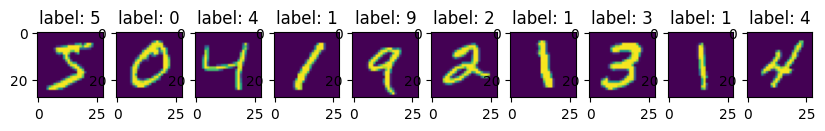

In [177]:
N = 10
f, ax  = plt.subplots(1,10, figsize=(10, 5))

for i in range(N):
    ax[i].imshow(train_dataset[i][0].reshape(28,28))
    ax[i].set_title('label: '+str(train_dataset[i][1]))

In [182]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [185]:
sample_input = next(iter(train_loader))[0]
input_shape = sample_input.shape[1:]
model = CustomNN(input_shape).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

In [186]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total

    if num_epochs%5==0:
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_accuracy = 100 * correct / total

        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy on train: {accuracy:.2f}%, Accuracy on test: {test_accuracy:.2f}%")

Epoch 1, Loss: 1.6698, Accuracy on train: 74.64%, Accuracy on test: 82.09%
Epoch 2, Loss: 1.5521, Accuracy on train: 81.88%, Accuracy on test: 82.59%
Epoch 3, Loss: 1.6440, Accuracy on train: 82.35%, Accuracy on test: 82.87%
Epoch 4, Loss: 1.5506, Accuracy on train: 82.67%, Accuracy on test: 83.03%
Epoch 5, Loss: 1.5759, Accuracy on train: 82.86%, Accuracy on test: 83.26%
Epoch 6, Loss: 1.5609, Accuracy on train: 83.00%, Accuracy on test: 83.35%
Epoch 7, Loss: 1.7736, Accuracy on train: 83.13%, Accuracy on test: 83.25%
Epoch 8, Loss: 1.6632, Accuracy on train: 84.51%, Accuracy on test: 90.67%
Epoch 9, Loss: 1.6035, Accuracy on train: 90.70%, Accuracy on test: 91.16%
Epoch 10, Loss: 1.6119, Accuracy on train: 90.97%, Accuracy on test: 91.46%


## Task 2.  Fashion MNIST Classification (11 points)
**From now on we will be using pytorch for all the tasks.**

We will create a 10-class classifier on the popular [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) dataset.

1. **(2 pt.)**  Load the dataset. Prepare dataloaders (train, test). Visualize images. (**Subproblem 2.1**)

2. **(2 pt.)**  Prepare the training procedure. Train a simple linear classifier `clf_lr`. (**Subproblem 2.2**)

3. **(2 pt.)**  Define, train and evaluate a sequential fully-connected classifier `clf_mlp`. (**Subproblem 2.3**)

4. **(3 pt.)**  Define, train and evaluate a convolutional + fully-connected classifier `clf_cnn`. (**Subproblem 2.4**)

5. **(2 pt.)**  Define, train and evaluate a deep neural network classifier `clf` from [torchvision.models](https://pytorch.org/vision/stable/models.html). (**Subproblem 2.5**)

To get points for subtasks 3-5, it is **mandatory** to succesfully complete preparation subtasks 1, 2.

In [190]:
# Import your required libraries
### BEGIN Solution (do not delete this comment!)

# >>> your imports here <<<

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
### END Solution (do not delete this comment!)

### Subproblems 2.1. Dataloaders (2 points).

<img width=350 src="https://habrastorage.org/getpro/habr/upload_files/8d7/152/a1f/8d7152a1fca496a45b68ac1311405e72.png">

**2.1.1) Here you have to load CIFAR-10 dataset. For this, you have to**
1. Create two composite [transform](https://pytorch.org/vision/stable/transforms.html#compositions-of-transforms) operations (`train_transform`, `test_transform`) to augment/normalize the data (random crops, rotations, etc.):
- On the train set, you are free to compose any transforms you want. It is not mandatory to use any transforms (except for `ToTensor`), but without proper data augmentation you will probably struggle to train classifier in the following tasks.
- On the test set, we may use only `Normalization` and `ToTensor`. If you use normalization, make sure it is the same on both train and test parts.
2. Load the train and test parts (`train_set`, `test_set`) of the [FashionMNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) dataset which use the transforms that you prepared.
3. Prepare train and test [dataloaders](https://pytorch.org/docs/stable/data.html) (`train_loader`, `test_loader`) which load the respective datasets. Use some batch size $\in[8, 128]$.

In [ ]:
### BEGIN Solution (do not delete this comment)

# >>> your solution here <<<

train_transform = transforms.Compose([
    transforms.RandomRotation(3),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_set = torchvision.datasets.FashionMNIST(root='./data_dev', train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.FashionMNIST(root='./data_dev', train=False, download=True, transform=test_transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

### END Solution (do not delete this comment)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print('Train size', len(train_set))
print('Test size', len(test_set))

Train size 60000
Test size 10000


**2.1.2) Plot random samples**

Now write a function **which takes a dataloader** and plots a **random batch** of images with their **true labels**. If the pre-processing in your dataloaders contains normalization, you **must** perform inverse normalization in order to make the colors look natural. You also have to remove the ticks/labels of axes from each subplot and assign a title to each subplot based on the image's class. Visualizing images helps to check that the preprocessing you do is meaningful.

In [379]:
def plot_random_images(loader):
    # BEGIN Solution (do not delete this comment!)

    images, labels = next(iter(loader))
    images = images * 0.5 + 0.5
    batch_size = 8
    fig, axes = plt.subplots(1, batch_size, figsize=(batch_size * 2, 2))
    if batch_size == 1:
        axes = [axes]
    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # END Solution (do not delete this comment!)

**Plot random train and test images.**

Train (augmented) images.


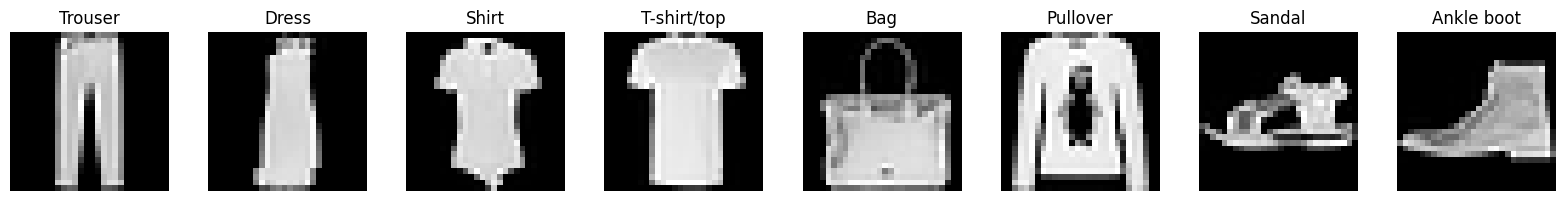

In [380]:
print('Train (augmented) images.')
plot_random_images(train_loader)

Test images (no augmentation).


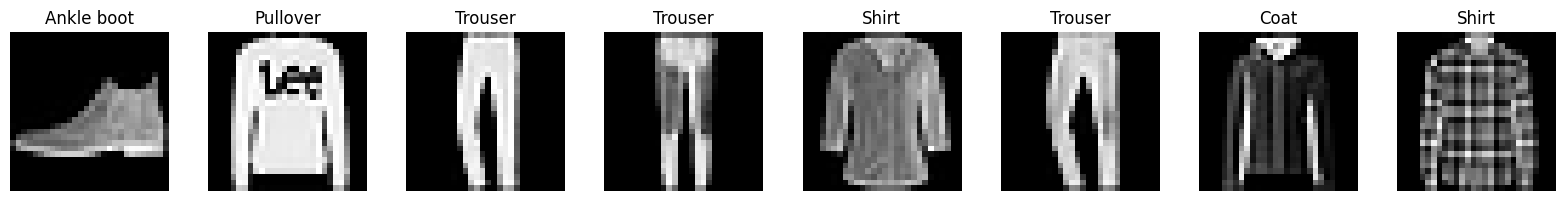

In [381]:
print('Test images (no augmentation).')
plot_random_images(test_loader)

### Subtask 2.2. Training procedure + linear classification ($\geq$84%)
**2.2.1) Now we are ready to write the code for training & evaluation. You have to prepare 2 following procedures:**
1. `epoch_train` has to perform 1 training epoch. It should iterate the given `loader`. For each batch it should compute the loss of the `clf` model by `criterion` and perform the gradient step by using the model optimizer `opt`. The function should return **2 values** -- average loss on batches during training and average accuracy of prediction.
2. `epoch_test` has to perform 1 evaluation epoch. It should do the same as `epoch_train` but without performing optimization of `clf` model.

At the beginning of `epoch_train` and `epoch_test` it is necessary to call `clf.train(True)` and `clf.eval()` respectively. This will change the behaviour of dropout/batchnorm layers to the one required during the procedure (training/evaluation). For more details, see this [post](https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch).

In [382]:
def epoch_train(loader, clf, criterion, opt):
    # BEGIN Solution (do not delete this comment!)

    clf.train(True)
    total_loss, correct, total = 0.0, 0, 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        opt.zero_grad()
        outputs = clf(images)
        loss = criterion(outputs, labels)
        loss.backward()
        opt.step()
        total_loss += loss.item() * images.size(0)
        predicted = outputs.argmax(dim=1)
        correct += (predicted == labels).sum().item()
        total += images.size(0)
    avg_loss = total_loss / total
    avg_acc = correct / total * 100
    return avg_loss, avg_acc

    # END Solution (do not delete this comment!)

def epoch_test(loader, clf, criterion):
    # BEGIN Solution (do not delete this comment!)

    clf.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = clf(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * images.size(0)
            predicted = outputs.argmax(dim=1)
            correct += (predicted == labels).sum().item()
            total += images.size(0)
    avg_loss = total_loss / total
    avg_acc = correct / total * 100
    return avg_loss, avg_acc

    # END Solution (do not delete this comment!)

# The function which you are going to use for model training
def train(train_loader, test_loader, clf, criterion, opt, n_epochs=50):
    for epoch in tqdm(range(n_epochs)):
        train_loss, train_acc = epoch_train(train_loader, clf, criterion, opt)
        test_loss, test_acc = epoch_test(test_loader, clf, criterion)

        print(f'[Epoch {epoch + 1}] train loss: {train_loss:.3f}; train acc: {train_acc:.2f}; ' +
              f'test loss: {test_loss:.3f}; test acc: {test_acc:.2f}')

Below we define a simple linear classifier which can be used to test the code above.

In [383]:
class LINEAR(nn.Module):
    def __init__(self, num_classes=10):
        super(LINEAR, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, num_classes)
        )

    def forward(self, x):
        return self.layers(x)

clf_lr = LINEAR(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_lr.parameters()]))

Number of weights: 7850


**2.2.2) Define the optimizer (use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)) and the training criterion. As the training criterion for classification, please use the [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).**

In [384]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

opt = torch.optim.SGD(clf_lr.parameters(), lr=1e-2, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

Now train your linear classifier. It is mandatory to achieve the **final test accuracy $\geq$84%**. If you do not achieve this accuracy, try changing optimizer parameters (learning rate, momentum, weight decay), train data augmentation (subtask 8.1), batch size, number of training epochs.

In [385]:
train(train_loader, test_loader, clf_lr, criterion, opt, n_epochs=20)

  5%|████▊                                                                                            | 1/20 [00:05<01:35,  5.04s/it]

[Epoch 1] train loss: 0.599; train acc: 79.58; test loss: 0.522; test acc: 82.01


 10%|█████████▋                                                                                       | 2/20 [00:10<01:30,  5.02s/it]

[Epoch 2] train loss: 0.482; train acc: 83.43; test loss: 0.518; test acc: 81.12


 15%|██████████████▌                                                                                  | 3/20 [00:15<01:25,  5.02s/it]

[Epoch 3] train loss: 0.458; train acc: 84.15; test loss: 0.477; test acc: 83.17


 20%|███████████████████▍                                                                             | 4/20 [00:20<01:20,  5.01s/it]

[Epoch 4] train loss: 0.448; train acc: 84.48; test loss: 0.483; test acc: 83.19


 25%|████████████████████████▎                                                                        | 5/20 [00:25<01:15,  5.03s/it]

[Epoch 5] train loss: 0.441; train acc: 84.77; test loss: 0.487; test acc: 82.09


 30%|█████████████████████████████                                                                    | 6/20 [00:30<01:10,  5.01s/it]

[Epoch 6] train loss: 0.434; train acc: 84.99; test loss: 0.470; test acc: 83.60


 35%|█████████████████████████████████▉                                                               | 7/20 [00:35<01:05,  5.00s/it]

[Epoch 7] train loss: 0.430; train acc: 85.14; test loss: 0.492; test acc: 82.32


 40%|██████████████████████████████████████▊                                                          | 8/20 [00:40<00:59,  5.00s/it]

[Epoch 8] train loss: 0.427; train acc: 85.17; test loss: 0.460; test acc: 83.53


 45%|███████████████████████████████████████████▋                                                     | 9/20 [00:45<00:54,  5.00s/it]

[Epoch 9] train loss: 0.423; train acc: 85.41; test loss: 0.463; test acc: 83.92


 50%|████████████████████████████████████████████████                                                | 10/20 [00:50<00:50,  5.02s/it]

[Epoch 10] train loss: 0.421; train acc: 85.49; test loss: 0.476; test acc: 83.45


 55%|████████████████████████████████████████████████████▊                                           | 11/20 [00:55<00:45,  5.04s/it]

[Epoch 11] train loss: 0.419; train acc: 85.50; test loss: 0.472; test acc: 83.81


 60%|█████████████████████████████████████████████████████████▌                                      | 12/20 [01:00<00:40,  5.05s/it]

[Epoch 12] train loss: 0.416; train acc: 85.70; test loss: 0.448; test acc: 84.30


 65%|██████████████████████████████████████████████████████████████▍                                 | 13/20 [01:05<00:35,  5.06s/it]

[Epoch 13] train loss: 0.415; train acc: 85.64; test loss: 0.452; test acc: 83.97


 70%|███████████████████████████████████████████████████████████████████▏                            | 14/20 [01:10<00:30,  5.07s/it]

[Epoch 14] train loss: 0.413; train acc: 85.61; test loss: 0.448; test acc: 84.06


 75%|████████████████████████████████████████████████████████████████████████                        | 15/20 [01:15<00:25,  5.06s/it]

[Epoch 15] train loss: 0.412; train acc: 85.68; test loss: 0.455; test acc: 83.85


 80%|████████████████████████████████████████████████████████████████████████████▊                   | 16/20 [01:20<00:20,  5.07s/it]

[Epoch 16] train loss: 0.411; train acc: 85.72; test loss: 0.461; test acc: 83.42


 85%|█████████████████████████████████████████████████████████████████████████████████▌              | 17/20 [01:25<00:15,  5.07s/it]

[Epoch 17] train loss: 0.410; train acc: 85.78; test loss: 0.543; test acc: 80.00


 90%|██████████████████████████████████████████████████████████████████████████████████████▍         | 18/20 [01:30<00:10,  5.08s/it]

[Epoch 18] train loss: 0.409; train acc: 85.81; test loss: 0.458; test acc: 83.76


 95%|███████████████████████████████████████████████████████████████████████████████████████████▏    | 19/20 [01:35<00:05,  5.08s/it]

[Epoch 19] train loss: 0.408; train acc: 85.86; test loss: 0.443; test acc: 84.29


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:40<00:00,  5.04s/it]

[Epoch 20] train loss: 0.408; train acc: 85.83; test loss: 0.447; test acc: 84.30


**2.2.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:**

I have tested the following hyperparameters:
- learning rate
- weight decay
- augmentations
- number of epochs 
- batch size

Most significant hyperparemeters for achiving the high score was learning rate and augmentations. Simple linear model can not learn hard augmentations, hence weak ones would work well. Also since optimization depends on learning rate, changing this hyperparameter highly influence on final score. 

### Subtask 2.3. Fully-connected classifier  ($\geq$86%)
**2.3.1)** Linear classifiers are doomed to provide poor performance on most image datasets. We make a step further and define a **multilayer perceptron** to classify FashionMNIST images. You have to build a **sequential fully-connected network** satisfying the following requirements:
1. $\geq 2$ hidden fully-connected (linear) layers;
2. The network has ReLU activations;
3. There is $\geq 1$ Dropout layer in network;
4. There is $\geq 1$ BatchNorm1d layer layer in network;

**A toy image** of a fully-connected neural network.

<img width=450 src="https://www.researchgate.net/profile/Vikas-Ramachandra-2/publication/323467511/figure/fig3/AS:599172503834624@1519865265479/Figure-A-general-fully-connected-DNN-for-classification.png">

Note your network's input shape is `BATCH_SIZE  x widht x height`, so you have to reshape the input tensor before feeding it to fully-connected layers. This can be done manually during `.forward()` or you may use `Flatten()` layer for this. You should use `torch.nn`!

In [388]:
class MLP(nn.Module):
    def __init__(self, num_classes=10):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)

            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)

            # END Solution (do not delete this comment!)
        )

    def forward(self, x):
        return self.layers(x)

clf_mlp = MLP(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_mlp.parameters()]))

# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_mlp(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 235658


**2.3.2) Now define the optimizer, criterion and train the network.** To obtain the points for this task, you must achieve **final test accuracy $\geq$86%**.

If you struggle to achieve this accuracy, try changing the architecture (stack more/less layers, make layers bigger/smaller, add more/less dropout, batchnorm layers), optimizer parameters, train data augmentation (subtask 5.1), batch size, number of training epochs, etc. SGD optimizer might not perform really well, so consider using [more advanced optimizers](https://pytorch.org/docs/stable/optim.html), e.g., `Adam`, `Adamax`, etc. Do not be afraid to stack more layers: it is ok if your net has millions of weights.

In [389]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

opt = torch.optim.AdamW(clf_mlp.parameters(), lr=1e-2, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_mlp, criterion, opt, n_epochs=5)

 20%|███████████████████▌                                                                              | 1/5 [00:05<00:21,  5.48s/it]

[Epoch 1] train loss: 0.570; train acc: 79.46; test loss: 0.437; test acc: 84.26


 40%|███████████████████████████████████████▏                                                          | 2/5 [00:10<00:16,  5.48s/it]

[Epoch 2] train loss: 0.465; train acc: 83.19; test loss: 0.407; test acc: 84.57


 60%|██████████████████████████████████████████████████████████▊                                       | 3/5 [00:16<00:10,  5.48s/it]

[Epoch 3] train loss: 0.445; train acc: 83.90; test loss: 0.392; test acc: 85.94


 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 4/5 [00:21<00:05,  5.47s/it]

[Epoch 4] train loss: 0.420; train acc: 84.82; test loss: 0.384; test acc: 85.64


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:27<00:00,  5.47s/it]

[Epoch 5] train loss: 0.409; train acc: 85.01; test loss: 0.382; test acc: 86.75


**2.3.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:**  
AdamW works better rather than SGD since it more advanced optimization algorithm. Combining several linear layers with BatchNorm and dropout is good idea for classification FashionMNIST. For this setup 5 epochs are enough.  


### Subtask 2.4. CNN classifier  ($\geq$91%)
**2.4.1)** Multilayer perceptrons are good but on image datasets they typically perform worse than convolutional neural networks. In this subtask, you have to code a classical architecture of a neural network for classification: several fully convolutional layers ("*features*") followed by fully-connected ("*classifier*").
1. In the *features* part, you are allowed to use `Conv2d` (conv linear), pooling (`MaxPool2d`, `AvgPool2d`), dropout, batchnorm, activations.
2. In the *classifier* part, you are allowed to use `Linear` (dense linear), dropout, batchnorm, activations.

Do not be afraid to stack more layers. It is ok to consider large networks with dozens of millions of parameters.

The following **example** image shows a potential variant of a network ([AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) considers 1000-class classification of `3 x 224 x 224` images).

<img width=550 src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*I-Pk-4n8He2ckiD71bInCA.png">

In [394]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)
            # END Solution (do not delete this comment!)
        )
        self.classifier = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
            # END Solution (do not delete this comment!)
        )

    def forward(self, x):
        # BEGIN Solution (do not delete this comment!)
        x = self.features(x)
        x = self.classifier(x)
        return x
        # END Solution (do not delete this comment!)


In [395]:
torch.cuda.set_device(0)
clf_cnn = CNN(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_cnn.parameters()]))

# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_cnn(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 1868746


**2.4.2) Now define the optimizer, criterion and train the network.** To get the points, you must achieve the **final test accuracy $\geq$91%**.

In [396]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

opt = torch.optim.AdamW(clf_cnn.parameters(), lr=1e-2, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_cnn, criterion, opt, n_epochs=5)

 20%|███████████████████▌                                                                              | 1/5 [00:07<00:31,  7.82s/it]

[Epoch 1] train loss: 0.422; train acc: 84.72; test loss: 0.286; test acc: 89.30


 40%|███████████████████████████████████████▏                                                          | 2/5 [00:15<00:23,  7.80s/it]

[Epoch 2] train loss: 0.295; train acc: 89.55; test loss: 0.243; test acc: 91.42


 60%|██████████████████████████████████████████████████████████▊                                       | 3/5 [00:23<00:15,  7.79s/it]

[Epoch 3] train loss: 0.268; train acc: 90.45; test loss: 0.230; test acc: 91.28


 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 4/5 [00:31<00:07,  7.81s/it]

[Epoch 4] train loss: 0.249; train acc: 90.98; test loss: 0.219; test acc: 92.08


100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.81s/it]

[Epoch 5] train loss: 0.237; train acc: 91.43; test loss: 0.208; test acc: 92.69


**2.4.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:**  
AdamW works better rather than SGD since it more advanced optimization algorithm. Also, obviously, structure of the classification model played important role on final accuracy: stacking the layers of similar CNN blocks helps to achieve high score. 

### Subtask 2.5. PyTorch classifier  ($\geq$93%)
**2.5.1)** After struggling to build the network manually, let us just import a pre-defined neural network architecture from `PyTorch` and train it. Take a look at the available [models](https://pytorch.org/vision/stable/models.html) of `torchvision.models`, pick the one you want and make it achieve $\geq 93$% **test accuracy**. We recommend to consider `VGG` or `ResNet` models. You **should not** use `pretrained=True` -- you job is to train the model from scratch.

An image of ResNet-34, plain and VGG-16 architectures.

![telegram-cloud-photo-size-4-5844643573331503502-w.jpg](attachment:telegram-cloud-photo-size-4-5844643573331503502-w.jpg)

<!-- <img width=750 src="https://miro.medium.com/max/1400/1*6hF97Upuqg_LdsqWY6n_wg.png"> -->

In [446]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<
  
clf = CNN(num_classes=10).cuda()
opt = torch.optim.AdamW(clf.parameters(), lr=1e-2, weight_decay=1e-3)
criterion = nn.CrossEntropyLoss()


# END Solution (do not delete this comment!)

In [447]:
train(train_loader, test_loader, clf, criterion, opt, n_epochs=15)

  7%|██████▍                                                                                          | 1/15 [00:07<01:50,  7.86s/it]

[Epoch 1] train loss: 0.421; train acc: 84.83; test loss: 0.267; test acc: 90.17


 13%|████████████▉                                                                                    | 2/15 [00:15<01:42,  7.86s/it]

[Epoch 2] train loss: 0.295; train acc: 89.42; test loss: 0.241; test acc: 91.11


 20%|███████████████████▍                                                                             | 3/15 [00:23<01:34,  7.85s/it]

[Epoch 3] train loss: 0.264; train acc: 90.45; test loss: 0.235; test acc: 91.44


 27%|█████████████████████████▊                                                                       | 4/15 [00:31<01:26,  7.87s/it]

[Epoch 4] train loss: 0.247; train acc: 91.00; test loss: 0.237; test acc: 91.46


 33%|████████████████████████████████▎                                                                | 5/15 [00:39<01:18,  7.86s/it]

[Epoch 5] train loss: 0.233; train acc: 91.53; test loss: 0.205; test acc: 92.31


 40%|██████████████████████████████████████▊                                                          | 6/15 [00:47<01:10,  7.88s/it]

[Epoch 6] train loss: 0.226; train acc: 91.77; test loss: 0.199; test acc: 92.68


 47%|█████████████████████████████████████████████▎                                                   | 7/15 [00:55<01:02,  7.87s/it]

[Epoch 7] train loss: 0.213; train acc: 92.40; test loss: 0.203; test acc: 92.49


 53%|███████████████████████████████████████████████████▋                                             | 8/15 [01:02<00:55,  7.87s/it]

[Epoch 8] train loss: 0.204; train acc: 92.61; test loss: 0.200; test acc: 92.73


 60%|██████████████████████████████████████████████████████████▏                                      | 9/15 [01:10<00:47,  7.88s/it]

[Epoch 9] train loss: 0.195; train acc: 92.99; test loss: 0.194; test acc: 93.06


 67%|████████████████████████████████████████████████████████████████                                | 10/15 [01:18<00:39,  7.88s/it]

[Epoch 10] train loss: 0.187; train acc: 93.31; test loss: 0.194; test acc: 93.41


 73%|██████████████████████████████████████████████████████████████████████▍                         | 11/15 [01:26<00:31,  7.87s/it]

[Epoch 11] train loss: 0.180; train acc: 93.46; test loss: 0.183; test acc: 93.46


 80%|████████████████████████████████████████████████████████████████████████████▊                   | 12/15 [01:34<00:23,  7.85s/it]

[Epoch 12] train loss: 0.174; train acc: 93.66; test loss: 0.190; test acc: 93.10


 87%|███████████████████████████████████████████████████████████████████████████████████▏            | 13/15 [01:42<00:15,  7.83s/it]

[Epoch 13] train loss: 0.170; train acc: 93.84; test loss: 0.192; test acc: 93.26


 93%|█████████████████████████████████████████████████████████████████████████████████████████▌      | 14/15 [01:49<00:07,  7.81s/it]

[Epoch 14] train loss: 0.163; train acc: 94.08; test loss: 0.197; test acc: 93.65


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:57<00:00,  7.85s/it]

[Epoch 15] train loss: 0.156; train acc: 94.31; test loss: 0.197; test acc: 93.52
